# Model Performance Analysis

After training and evaluating the models we  have made the following inferences regarding the machine learning model

### Classification Model Report:

- The **Neural Network** demonstrates the **best performance** with nearly perfect scores (F1: 0.98, Precision: 0.98, Recall: 0.98) but lacks interpretability. 

- **Logistic Regression** offers **high interpretability** with strong and balanced metrics (F1: 0.97, Precision: 0.97, Recall: 0.97) and **minimal overfitting**. 

- **SVM** achieves a **strong balance between performance and generalization** (F1: 0.94, Precision: 0.94, Recall: 0.94), making it a reliable choice for **high-dimensional data**. 

- **Random Forest** suffers from **significant overfitting** (F1: 0.71, Precision: 0.75, Recall: 0.72), even after hyperparameter tuning. 

- **Decision Tree serves** as a simple baseline model with moderate performance (F1: 0.74, Precision: 0.74, Recall: 0.74) but is outperformed by other models.

### Regression Models Report:

- The **Neural Network** demostrates the **best performannce** with nearly perect scores. But lacks interpretability.

- All the **regression models** demonstrated very similar outcomes. Therefore, I will proceed with **linear regression** for the purpose of interpretation.


Final Model selection : CLassification - Logistic Regression, Regression - Linear Regression

## Part - 1 Importing all the required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

In [3]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, roc_curve, auc,r2_score
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

In [4]:
from sklearn.metrics import roc_auc_score

In [5]:
!pip install lime

In [6]:
!pip install shap

In [7]:
import shap

In [8]:
from lime.lime_tabular import LimeTabularExplainer

## Part-2 Classification Model Analysis


### Part- 2.1 Classification

Models Included = Logistic Regression, Random Forest, Decision Trees,Support Vector Machine and Neural Network 

In [ ]:


models = {"Logistic Regression": LogisticRegression(penalty='l2', max_iter=500, random_state=42, C=0.1), # Add regularization (C=0.1)
        "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, random_state=42),  # Limit depth and splits
        "Decision Tree Classifier": DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42), # Limit depth and splits
        "Support Vector Machine (SVM)": SVC(C=1.0, kernel='rbf', probability=True, random_state=42),  # Default regularization (C=1.0)
        "Neural Network": MLPClassifier(hidden_layer_sizes=(50,), activation='relu', max_iter=750, alpha=0.001, random_state=42) # Add regularization (alpha) 
}

Importing the Training ang testing data for classification

In [10]:
X_c= pd.read_csv(r"D:\Aadhitya\Downloads\X_Classification_data.csv")
y_c= pd.read_csv(r"D:\Aadhitya\Downloads\y_Classification_data.csv")

In [11]:
X_c

Age  Gender  Severity  Consultation_History  Stress_Level  \
0    0.508886       1         3                     1             0   
1   -0.994576       0         3                     1             0   
2   -1.638917       0         3                     0             0   
3   -1.137763       1         0                     0             0   
4    0.938447       2         3                     0             1   
..        ...     ...       ...                   ...           ...   
495  0.437293       1         3                     0             1   
496 -0.421829       1         1                     1             2   
497 -0.922983       1         3                     1             0   
498 -0.994576       1         1                     0             0   
499 -0.135455       1         3                     0             1   

     Sleep_Hours  Work_Hours  Physical_Activity_Hours  Occupation_Engineering  \
0      -1.515233    1.046071                 0.281144                       1   
1       1.461994    1.114090                -0.043503                       0   
2       0.819847   -0.994512                -1.342092                       0   
3      -1.515233    0.229838                -1.666739                       0   
4       0.469585    0.637954                 1.579733                       0   
..           ...         ...                      ...                     ...   
495     0.002569    1.386168                 0.605792                       0   
496    -1.281725   -0.178279                -1.017444                       1   
497     1.637125   -0.518376                -1.342092                       0   
498    -0.581201   -0.586396                -1.666739                       0   
499    -1.515233    1.454188                 0.605792                       1   

     Occupation_Finance  ...  Occupation_Sales  Country_Canada  \
0                     0  ...                 0               0   
1                     0  ...                 0               0   
2                     1  ...                 0               0   
3                     0  ...                 0               0   
4                     1  ...                 0               0   
..                  ...  ...               ...             ...   
495                   1  ...                 0               0   
496                   0  ...                 0               0   
497                   0  ...                 0               0   
498                   0  ...                 0               0   
499                   0  ...                 0               0   

     Country_Germany  Country_India  Country_Other  Country_UK  Country_USA  \
0                  0              1              0           0            0   
1                  1              0              0           0            0   
2                  0              0              0           1            0   
3                  1              0              0           0            0   
4                  0              0              1           0            0   
..               ...            ...            ...         ...          ...   
495                0              1              0           0            0   
496                0              1              0           0            0   
497                0              1              0           0            0   
498                0              0              0           0            1   
499                0              0              0           0            1   

     Work_Life_Balance  Stress_Sleep_Ratio  Mental_Health_Risk_Factor  
0            -0.067335           -1.120586                   0.637536  
1             0.163421           -1.120586                   0.003172  
2             0.900636           -1.120586                  -0.631193  
3             2.447012           -1.120586                  -2.534287  
4            -0.783332           -0.136482                   0.003172  
..        

In [12]:
y_c

Mental_Health_Condition
0                          1
1                          0
2                          0
3                          0
4                          0
..                       ...
495                        0
496                        1
497                        0
498                        1
499                        0

[500 rows x 1 columns]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_c, y_c, test_size=0.2, random_state=42)

In [14]:
results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred_test, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred_test, average='weighted', zero_division=0)
    results[model_name] = {
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1}



Training Logistic Regression...
Training Random Forest...


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training Decision Tree Classifier...
Training Support Vector Machine (SVM)...


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training Neural Network...


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [15]:
results_df = pd.DataFrame(results).T
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Model'}, inplace=True)
results_df

Model  Train Accuracy  Test Accuracy  Precision  \
0           Logistic Regression          0.9750           0.97   0.971800   
1                 Random Forest          0.9875           0.72   0.757978   
2      Decision Tree Classifier          0.7975           0.74   0.745347   
3  Support Vector Machine (SVM)          0.9925           0.94   0.940848   
4                Neural Network          1.0000           0.98   0.980000   

   Recall  F1 Score  
0    0.97  0.970027  
1    0.72  0.713864  
2    0.74  0.740000  
3    0.94  0.940048  
4    0.98  0.980000

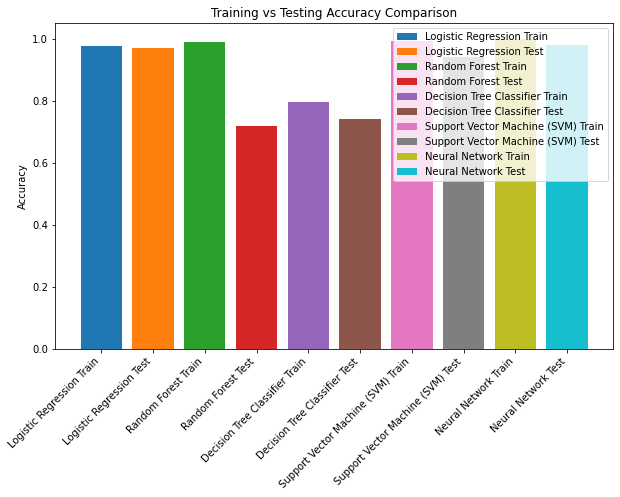

In [16]:
plt.figure(figsize=(10, 6))
for name, metrics in results.items():
    plt.bar(name + " Train", metrics["Train Accuracy"], label=name + " Train")
    plt.bar(name + " Test", metrics["Test Accuracy"], label=name + " Test")
plt.title("Training vs Testing Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

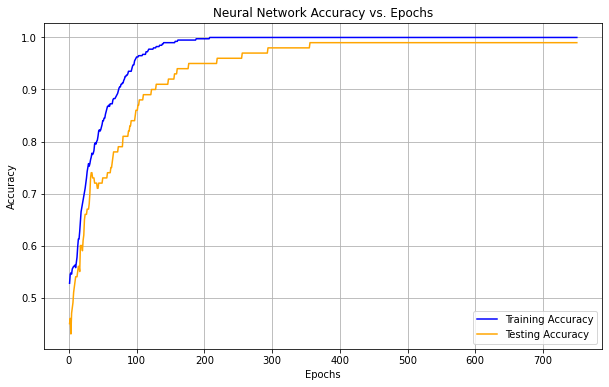

In [17]:
nn_model = MLPClassifier(hidden_layer_sizes=(50,), activation='relu', max_iter=750, alpha=0.001, random_state=42)
train_accuracies = []
test_accuracies = []
epochs = 750

# Train the model for a fixed number of epochs and record accuracy
for epoch in range(epochs):
    nn_model.partial_fit(X_train, y_train, classes=np.unique(y_train))
    # Record training accuracy
    train_predictions = nn_model.predict(X_train)
    train_accuracies.append(accuracy_score(y_train, train_predictions))
    # Record testing accuracy
    test_predictions = nn_model.predict(X_test)
    test_accuracies.append(accuracy_score(y_test, test_predictions))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_accuracies, label="Training Accuracy", color='blue')
plt.plot(range(1, epochs + 1), test_accuracies, label="Testing Accuracy", color='orange')
plt.title("Neural Network Accuracy vs. Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

Kindly Sroll till end to view the result

### Part - 2.2 Regression Model Interpretation

In [18]:
coefficients = models['Logistic Regression'].coef_[0]
odds_ratios = np.exp(coefficients)

# Display coefficients and odds ratios
for feature, coef, odds in zip(X_c.columns, coefficients, odds_ratios):
    print(f"Feature: {feature}, Coefficient: {coef:.3f}, Odds Ratio: {odds:.3f}")

Feature: Age, Coefficient: 0.008, Odds Ratio: 1.008
Feature: Gender, Coefficient: -0.031, Odds Ratio: 0.970
Feature: Severity, Coefficient: -1.257, Odds Ratio: 0.285
Feature: Consultation_History, Coefficient: -0.962, Odds Ratio: 0.382
Feature: Stress_Level, Coefficient: -0.653, Odds Ratio: 0.520
Feature: Sleep_Hours, Coefficient: -0.171, Odds Ratio: 0.843
Feature: Work_Hours, Coefficient: 0.048, Odds Ratio: 1.049
Feature: Physical_Activity_Hours, Coefficient: 0.054, Odds Ratio: 1.055
Feature: Occupation_Engineering, Coefficient: 0.112, Odds Ratio: 1.119
Feature: Occupation_Finance, Coefficient: 0.002, Odds Ratio: 1.002
Feature: Occupation_Healthcare, Coefficient: 0.163, Odds Ratio: 1.177
Feature: Occupation_IT, Coefficient: 0.108, Odds Ratio: 1.114
Feature: Occupation_Other, Coefficient: -0.008, Odds Ratio: 0.992
Feature: Occupation_Sales, Coefficient: -0.004, Odds Ratio: 0.996
Feature: Country_Canada, Coefficient: 0.254, Odds Ratio: 1.290
Feature: Country_Germany, Coefficient: -0.057

### Interpretation of Logistic model:
- **Age** - For every additional year of age, the odds of having a mental health condition increase slightly by 0.8%. This suggests age has a minimal but positive association with the target variable. 

- **Gender** - Being of a different gender (likely coded as male/female) decreases the odds of having a mental health condition by 3%. The impact is small.

- **Severity** - Higher severity decreases the odds of a mental health condition by 71.5% (1 - 0.285). This could reflect a complex relationship where severity may represent conditions outside the scope of mental health.

- **Consultation History** - A history of consultations reduces the odds of a mental health condition by 61.8% (1 - 0.382), possibly due to prior interventions.

- **Stress Level** - Higher stress levels reduce the odds of having a mental health condition by 48%, which could indicate that stress is being managed or coded differently in this dataset.

- **Sleep Hours** - More sleep hours reduce the odds of a mental health condition by 15.7% (1 - 0.843), aligning with the importance of sleep in mental health.

- **Work Hours** - Longer work hours increase the odds of a mental health condition by 4.9%, indicating a minor positive relationship.

- **Physical Activity Hours** -  Increased physical activity hours raise the odds of a mental health condition by 5.5%. This may suggest an indirect relationship where physical activity is a coping mechanism.

- **Occupation** - Engineering, healthcare, and IT occupations slightly increase the odds of a mental health condition, with healthcare having the largest impact (17.7% increase).Occupations categorized as "Other" or "Sales" slightly reduce the odds but with negligible effects.

- **Country** - Canada shows the highest increase in odds (29%), suggesting location influences mental health risk.Germany and other countries slightly reduce the odds of mental health conditions.

- **Work-Life Balance** - Better work-life balance increases the odds of a mental health condition by 1.9%, which might reflect complex interactions between workload and stress.

- **Stress-Sleep Ratio** - A higher stress-to-sleep ratio reduces the odds of mental health conditions by 43.5%. This likely reflects a balancing effect where higher stress accompanied by adequate sleep mitigates risk.

- **Mental Health Risk Factor** - Mental health risk factors increase the odds of having a mental health condition nearly tenfold, making it the most significant predictor in this model.

### Part 2.3- LIME AND SHAP ANALYSIS

In [19]:
explainer = LimeTabularExplainer(X_train.values, training_labels=y_train.values, feature_names=X_c.columns, mode='classification')

In [20]:
logistic_model = models['Logistic Regression']

In [21]:
sample = X_test.iloc[0].values
exp = explainer.explain_instance(sample, logistic_model.predict_proba)
exp.show_in_notebook()

### **Summary of Significantly Contributing Features from LIME Analysis:**

1. **Mental_Health_Risk_Factor:**
   - The feature has the highest positive contribution to predicting Class 1, indicating a strong influence in driving the model towards this outcome.

2. **Severity:**
   - A critical feature with a significant positive contribution to the prediction of Class 1, highlighting the impact of high severity on the model’s output.

3. **Consultation History:**
   - Positively contributes to the prediction of Class 1, suggesting that prior consultation history is an important factor.

4. **Sleep Hours:**
   - A major negative contributor to the prediction of Class 1, where fewer sleep hours reduce the likelihood of the positive class.

5. **Country_Canada:**
   - Contributes minimally but still has a slight positive influence on the prediction of Class 1 for this specific instance.

6. **Other Features:**
   - Features like **Occupation_Healthcare**, **Country_UK**, and **Gender** have negligible contributions, suggesting their limited impact on this prediction.



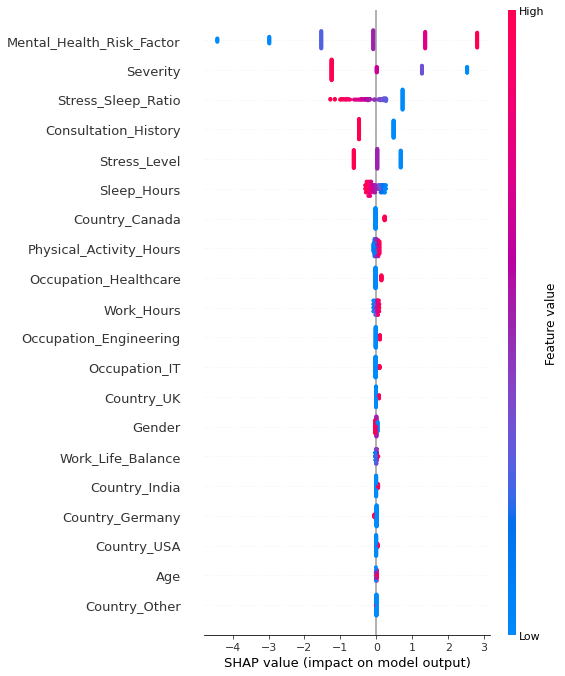

In [22]:
explainer = shap.LinearExplainer(logistic_model, X_train)
shap_values = explainer.shap_values(X_test)

# SHAP Summary Plot (Global Interpretability)
shap.summary_plot(shap_values, X_test)

# SHAP Force Plot (Local Interpretability for a Single Prediction)
sample_index = 0  
shap.force_plot(explainer.expected_value, shap_values[sample_index], X_test.iloc[sample_index])

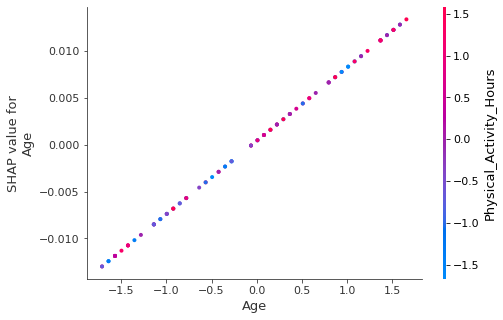

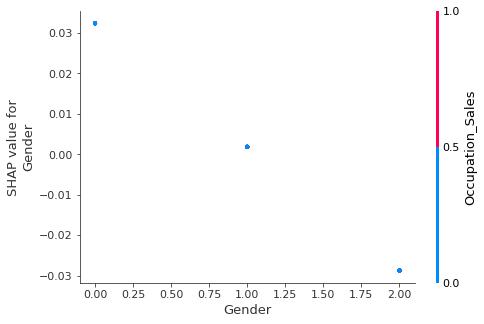

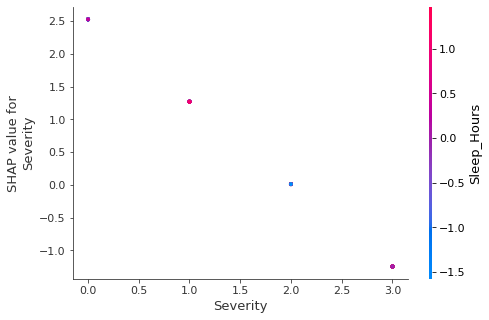

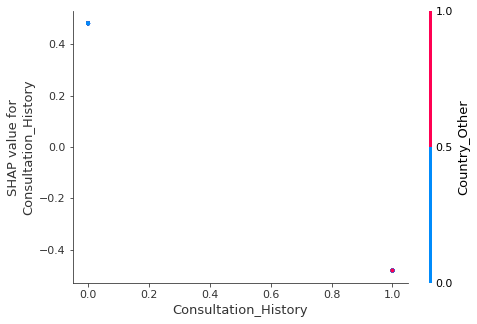

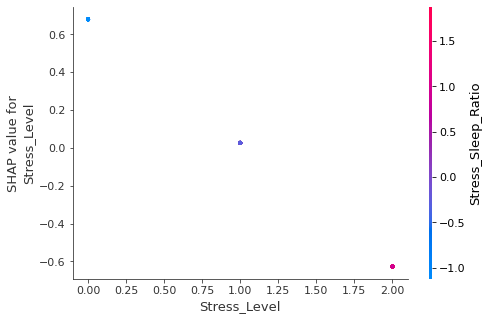

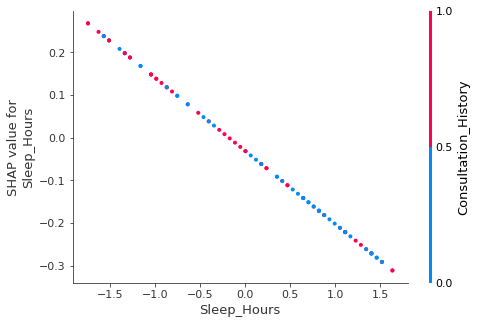

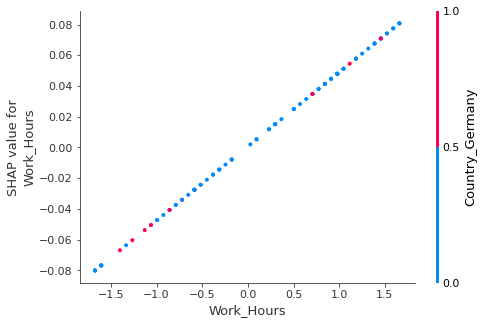

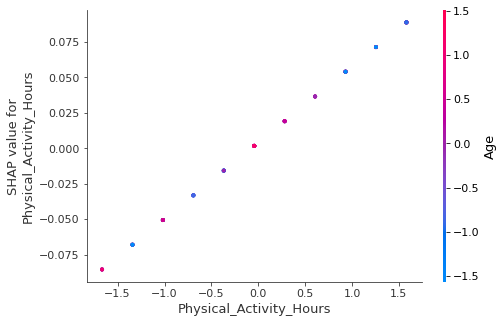

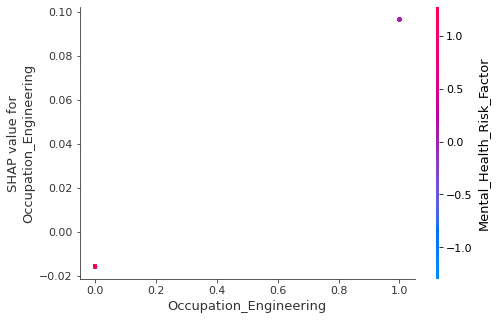

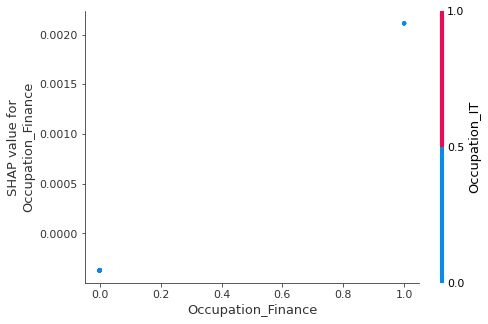

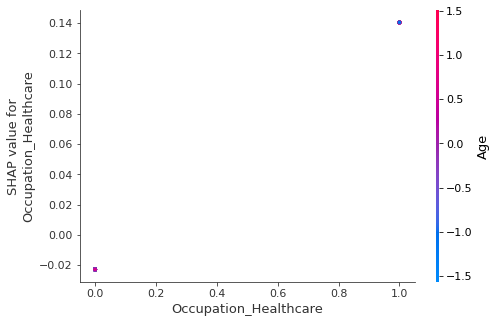

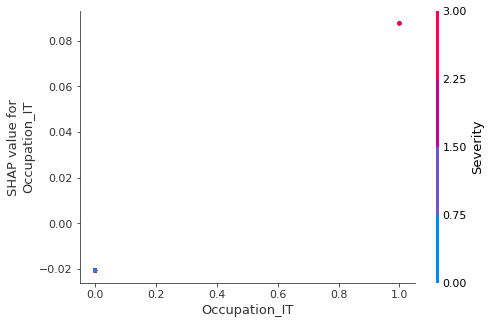

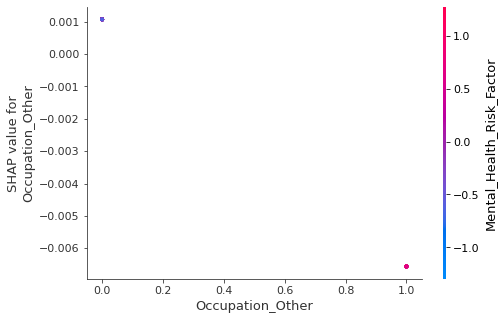

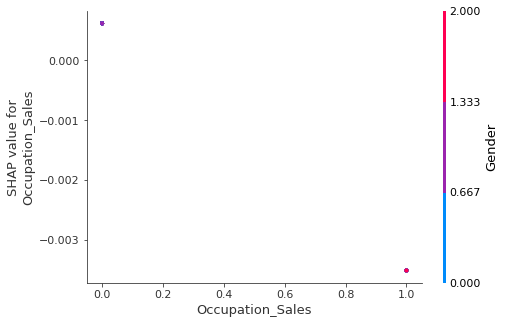

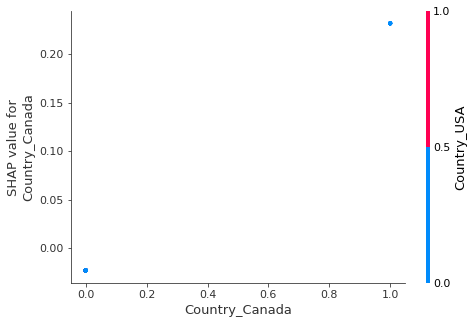

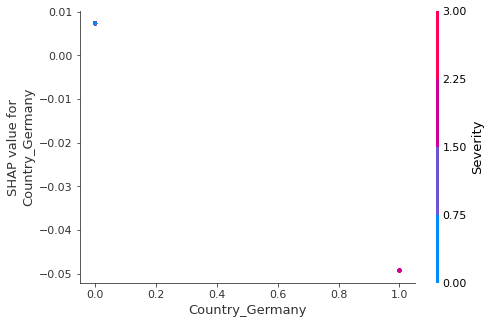

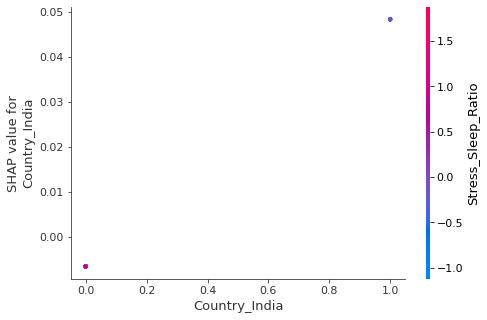

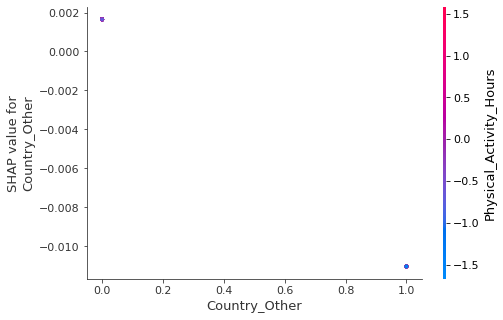

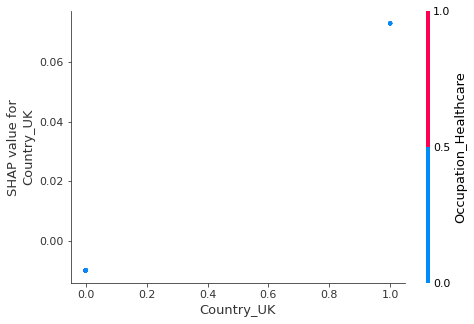

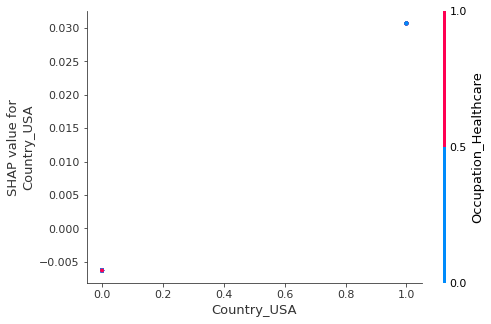

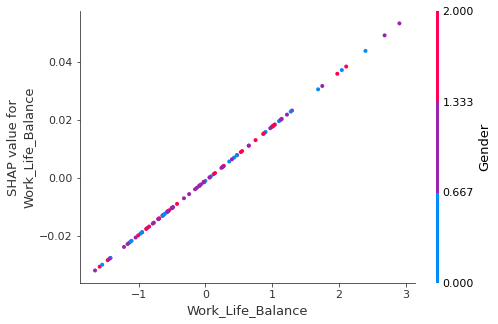

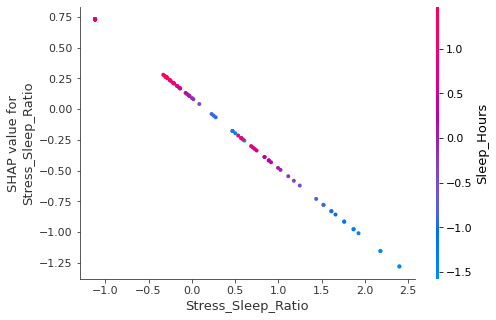

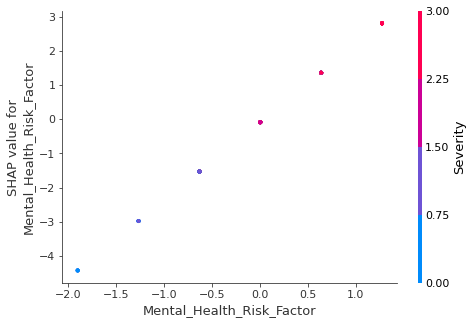

In [23]:
for feature in X_test.columns:
    shap.dependence_plot(feature, shap_values, X_test)

### **Summary of Significantly Contributing Features from SHAP Analysis:**

1. **Work_Life_Balance:**
   - A strong linear relationship indicates that better work-life balance consistently contributes positively to predictions.

2. **Stress_Sleep_Ratio:**
   - Higher stress relative to sleep significantly decreases the likelihood of positive predictions due to its strong negative relationship with SHAP values.

3. **Mental_Health_Risk_Factor:**
   - A strong positive linear relationship shows that higher mental health risk strongly increases the likelihood of a positive prediction.

4. **Severity:**
   - High severity values strongly increase prediction probability, making it a critical factor in the model’s output.

5. **Sleep Hours:**
   - Fewer sleep hours contribute negatively, while higher sleep hours positively influence predictions.

6. **Physical Activity Hours:**
   - More physical activity hours are consistently associated with positive SHAP values, indicating their beneficial effect on predictions.



### Part 2.4 - Model Limitations and Areas for improvement

### **Limitations of Logistic Regression Model:**

1. **Feature Interaction and Complexity:**
   - Logistic regression assumes a linear relationship between features and the log-odds of the target variable, which limits its ability to model complex interactions.
   - From SHAP analysis, features like `Stress_Sleep_Ratio` and `Mental_Health_Risk_Factor` may have interactions that logistic regression cannot fully capture.

2. **Sensitivity to Outliers:**
   - Logistic regression is sensitive to outliers in the data, which can disproportionately affect the model's performance. Features like `Sleep_Hours` with negative SHAP contributions may amplify this issue if outliers exist.

3. **Overfitting Risk in High Dimensionality:**
   - Although the training and test accuracy are high (97% each), the regularization parameter (`C=0.1`) may need further tuning to prevent overfitting on the training data.

4. **Limited Handling of Nonlinear Relationships:**
   - Key features  might exhibit nonlinear effects, which are not well modeled by logistic regression.

5. **Class Imbalance:**
   - While the performance metrics (Precision, Recall, F1 Score) are high, class imbalance could affect the generalizability of the model.

6. **Limited Interpretability of Transformed Features:**
   - Preprocessing (standardization) can make the interpretation of coefficients less intuitive for stakeholders.

### **Potential Areas for Improvement:**

1. **Feature Engineering:**
   - Add interaction terms explicitly (e.g., `Stress_Sleep_Ratio * Severity`) to capture relationships between features.
   - Explore polynomial or nonlinear transformations of features to improve fit.

2. **Robustness to Outliers:**
   - Apply robust scaling techniques or handle outliers explicitly to prevent them from distorting model performance.

3. **Alternative Models for Comparison:**
   - Logistic regression could be supplemented or replaced with models like Support Vector Machines (SVM) or Neural Networks, which performed well in test accuracy (94% and 98% respectively) as shown in the table.

4. **Addressing Nonlinearity:**
   - Consider kernelized logistic regression or ensemble methods to capture nonlinearity in features 



### **Conclusion:**
While logistic regression provides a strong baseline with excellent performance metrics, its limitations in handling feature interactions and nonlinear relationships suggest opportunities for enhancement. Exploring ensemble models or incorporating interaction terms could lead to a more nuanced and robust model.


## Part 3 - Regression Analysis

### Part 3.1 - Regression

Models Used = Linear Regression, Ridge and Lasso Regression, and Neural Network

In [24]:
models_regression = {
    "Linear Regression": LinearRegression(), 
    "Ridge Regression": Ridge(alpha=1.0),  
    "Lasso Regression": Lasso(alpha=0.001),  # Adjusted alpha from grid search results
    "Neural Network": MLPRegressor(
        hidden_layer_sizes=(50, 50),  # Adjusted hidden layers
        activation='relu',           # Adjusted activation function
        alpha=0.01,                  # Adjusted regularization strength
        learning_rate_init=0.01,     # Adjusted learning rate
        max_iter=1000,             
    )
}

Importing Training and testing dataset For Regression

In [25]:
X_r= pd.read_csv(r"D:\Aadhitya\Downloads\X_regression_data.csv")
y_r= pd.read_csv(r"D:\Aadhitya\Downloads\y_regression_data.csv")

In [26]:
X_r

Age  Gender  Severity  Consultation_History  Stress_Level  \
0    0.659574       1         3                     1             0   
1    0.212766       0         3                     1             0   
2    0.021277       0         3                     0             0   
3    0.170213       1         0                     0             0   
4    0.787234       2         3                     0             1   
..        ...     ...       ...                   ...           ...   
495  0.638298       1         3                     0             1   
496  0.382979       1         1                     1             2   
497  0.234043       1         3                     1             0   
498  0.212766       1         1                     0             0   
499  0.468085       1         3                     0             1   

     Sleep_Hours  Work_Hours  Physical_Activity_Hours  Occupation_Engineering  \
0       0.083333        0.80                      0.6                       1   
1       0.933333        0.82                      0.5                       0   
2       0.750000        0.20                      0.1                       0   
3       0.083333        0.56                      0.0                       0   
4       0.650000        0.68                      1.0                       0   
..           ...         ...                      ...                     ...   
495     0.516667        0.90                      0.7                       0   
496     0.150000        0.44                      0.2                       1   
497     0.983333        0.34                      0.1                       0   
498     0.350000        0.32                      0.0                       0   
499     0.083333        0.92                      0.7                       1   

     Occupation_Finance  ...  Occupation_Other  Occupation_Sales  \
0                     0  ...                 0                 0   
1                     0  ...                 0                 0   
2                     1  ...                 0                 0   
3                     0  ...                 1                 0   
4                     1  ...                 0                 0   
..                  ...  ...               ...               ...   
495                   1  ...                 0                 0   
496                   0  ...                 0                 0   
497                   0  ...                 0                 0   
498                   0  ...                 0                 0   
499                   0  ...                 0                 0   

     Country_Canada  Country_Germany  Country_India  Country_Other  \
0                 0                0              1              0   
1                 0                1              0              0   
2                 0                0              0              0   
3                 0                1              0              0   
4                 0                0              0              1   
..              ...              ...            ...            ...   
495               0                0              1              0   
496               0                0              1              0   
497               0                0              1              0   
498               0                0              0              0   
499               0                0              0              0   

     Country_UK  Country_USA  Stress_Sleep_Ratio  Mental_Health_Risk_Factor  
0             0            0            0.000000                   0.714286  
1             0            0            0.000000                   0.571429  
2             1            0            0.000000                   0.428571  
3             0            0            0.000000                   0.000000  
4             0            0            0.273224                   0.571429  
..          ...          ...                 ...          

In [27]:
y_r

Work_Life_Balance
0             0.347808
1             0.398478
2             0.560357
3             0.899913
4             0.190589
..                 ...
495           0.328580
496           0.515719
497           0.611027
498           0.825169
499           0.332517

[500 rows x 1 columns]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_r, y_r, test_size=0.2, random_state=42)

In [29]:
regression_results_tuned = {}

for name, model in models_regression.items():

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculating metrics for training data
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_r2 = r2_score(y_train, y_train_pred)
    
    # Calculating metrics for testing data
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_r2 = r2_score(y_test, y_test_pred)
    regression_results_tuned[name] = {
        "Train MSE": train_mse,
        "Train RMSE": train_rmse,
        "Train R2": train_r2,
        "Test MSE": test_mse,
        "Test RMSE": test_rmse,
        "Test R2": test_r2
    }

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [30]:
regression_results_df = pd.DataFrame(regression_results_tuned).T
regression_results_df

Train MSE  Train RMSE  Train R2  Test MSE  Test RMSE  \
Linear Regression   0.005013    0.070803  0.886863  0.004648   0.068177   
Ridge Regression    0.005051    0.071073  0.885998  0.004522   0.067244   
Lasso Regression    0.005213    0.072204  0.882343  0.004485   0.066968   
Neural Network      0.000952    0.030855  0.978514  0.004079   0.063867   

                    Test R2  
Linear Regression  0.903735  
Ridge Regression   0.906352  
Lasso Regression   0.907121  
Neural Network     0.915522

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


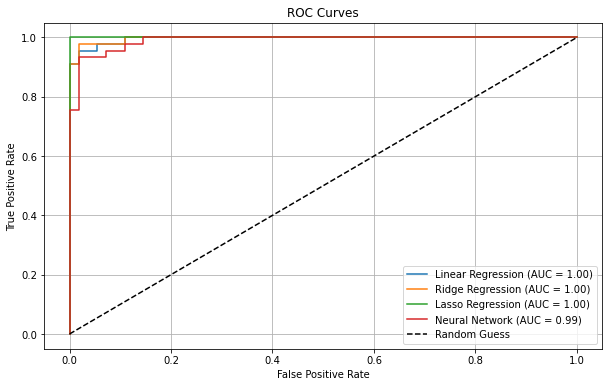

In [33]:
y_true = (y_test > y_test.mean()).astype(int)  # Convert regression target to binary for demonstration
roc_results = {}

for name, model in models_regression.items():
    model.fit(X_train, y_train)
    y_scores = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    auc = roc_auc_score(y_true, y_scores)
    roc_results[name] = (fpr, tpr, auc)
plt.figure(figsize=(10, 6))
for name, (fpr, tpr, auc) in roc_results.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend(loc="lower right")
plt.grid()
plt.show()

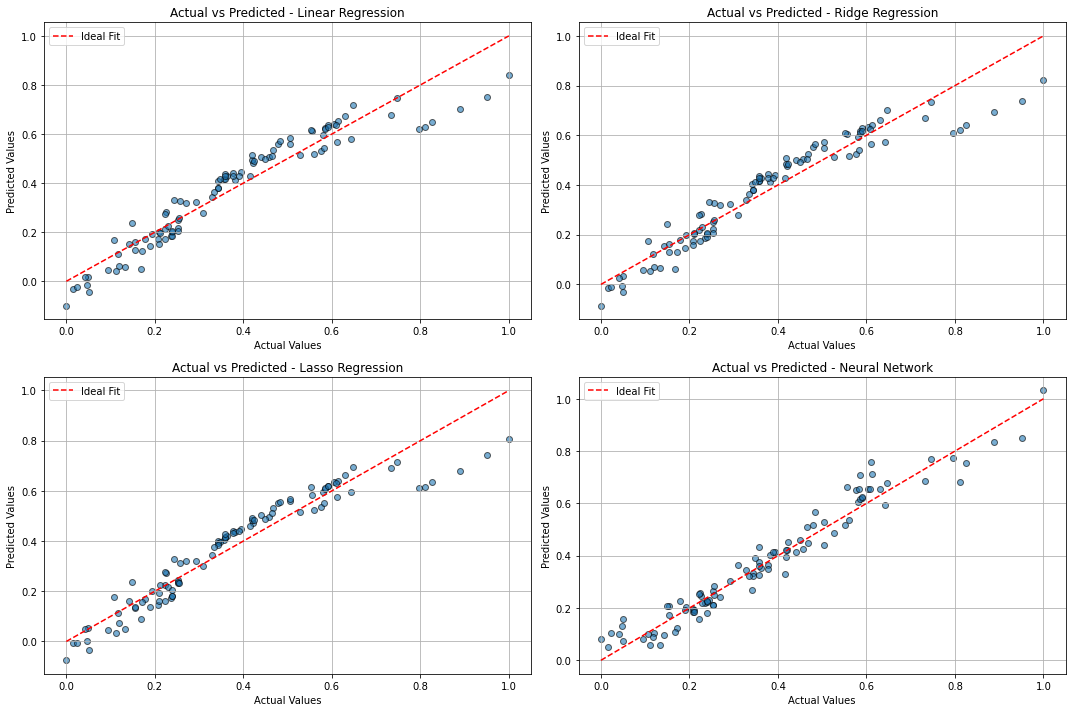

In [34]:
plt.figure(figsize=(15, 10))

for i, (name, model) in enumerate(models_regression.items(), start=1):
    y_test_pred = model.predict(X_test)
    plt.subplot(2, 2, i)  # Arrange plots in a 2x2 grid
    plt.scatter(y_test, y_test_pred, alpha=0.6, edgecolor='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal Fit")
    plt.title(f"Actual vs Predicted - {name}")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()



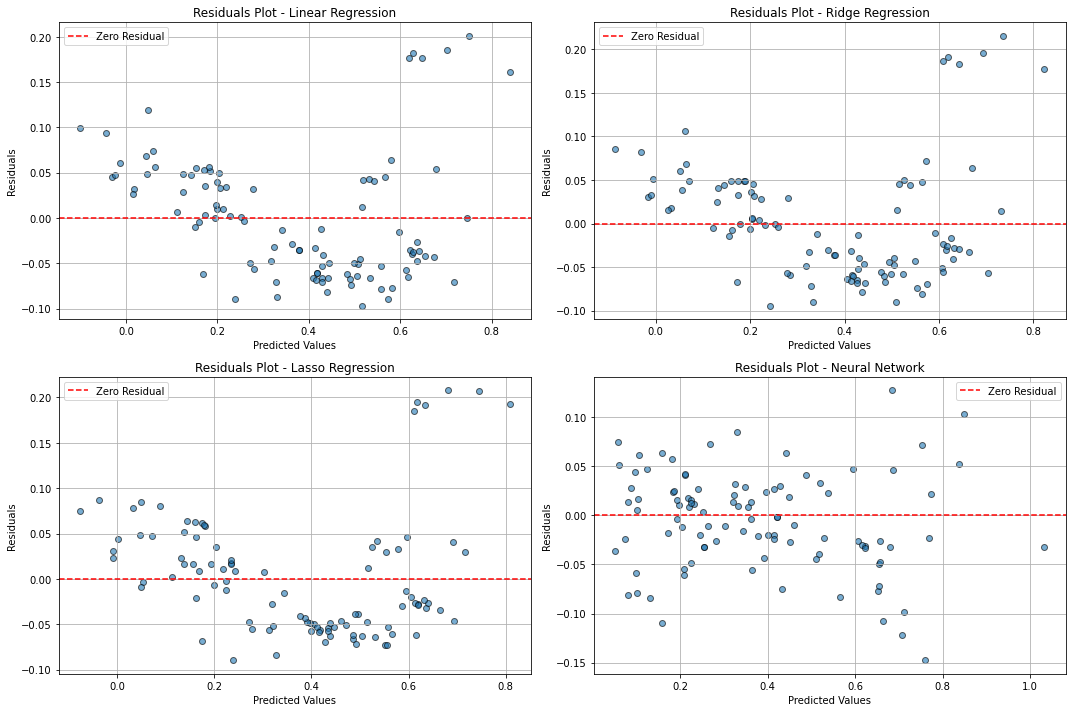

In [37]:
# Visualization of residuals for each model
y_t = y_test.to_numpy().ravel() if isinstance(y_test, pd.DataFrame) else y_test

# Create figure for residual plots
plt.figure(figsize=(15, 10))

for i, (name, model) in enumerate(models_regression.items(), start=1):
    # Get predictions from the model
    y_test_pred = model.predict(X_test)
    
    # Ensure predictions are flattened
    y_test_pred = np.ravel(y_test_pred)
    
    # Compute residuals
    residuals = y_t - y_test_pred
    
    # Create subplot
    plt.subplot(2, 2, i)
    plt.scatter(y_test_pred, residuals, alpha=0.6, edgecolor='k')
    plt.axhline(0, color='r', linestyle='--', label="Zero Residual")
    plt.title(f"Residuals Plot - {name}")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

## Part 3.2 - Linear Regression Interpretation

In [39]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


LinearRegression()

In [41]:
coefficients = linear_model.coef_
print(f"Shape of coefficients: {coefficients.shape}")

In [43]:
coefficients = coefficients.flatten()

print("Feature Coefficients for Linear Regression:")
for feature, coef in zip(X_train.columns, coefficients):
    print(f"Feature: {feature}, Coefficient: {coef:.3f}")

Feature Coefficients for Linear Regression:
Feature: Age, Coefficient: 0.018
Feature: Gender, Coefficient: -0.002
Feature: Severity, Coefficient: -0.001
Feature: Consultation_History, Coefficient: 0.009
Feature: Stress_Level, Coefficient: 0.002
Feature: Sleep_Hours, Coefficient: -0.011
Feature: Work_Hours, Coefficient: 0.286
Feature: Physical_Activity_Hours, Coefficient: -0.629
Feature: Occupation_Engineering, Coefficient: 0.014
Feature: Occupation_Finance, Coefficient: -0.006
Feature: Occupation_Healthcare, Coefficient: 0.002
Feature: Occupation_IT, Coefficient: 0.018
Feature: Occupation_Other, Coefficient: 0.021
Feature: Occupation_Sales, Coefficient: 0.005
Feature: Country_Canada, Coefficient: 0.025
Feature: Country_Germany, Coefficient: 0.027
Feature: Country_India, Coefficient: 0.021
Feature: Country_Other, Coefficient: 0.037
Feature: Country_UK, Coefficient: 0.030
Feature: Country_USA, Coefficient: 0.026
Feature: Stress_Sleep_Ratio, Coefficient: -0.021
Feature: Mental_Health_Risk

### Interpretation of Linear Model

- **Work Hours (0.286)**: A strong positive coefficient indicates that increasing work hours significantly worsens work-life balance, making it the most impactful predictor.

- **Country_Other (0.037), Country_UK (0.030), Country_Germany (0.027), and Country_USA (0.026)**: Individuals in these regions show slightly poorer work-life balance compared to the baseline.


- **Physical Activity Hours (-0.629)**: The strongest negative coefficient implies that increased physical activity hours greatly improve work-life balance by reducing its score.

- **Stress_Sleep_Ratio (-0.021)**: A slight negative coefficient suggests that managing stress relative to sleep slightly improves work-life balance.

- Features like **Age (0.018), Consultation_History (0.009), Mental_Health_Risk_Factor (0.010), and Occupation_IT (0.018)** show small coefficients, indicating a minor effect on work-life balance.

- Variables such as **Gender (-0.002), Severity (-0.001), and Sleep_Hours (-0.011)** have negligible influence.

### Part 3.3 - LIME and SHAP Analysis

In [44]:
explainer = LimeTabularExplainer(X_train.values, training_labels=y_train.values, feature_names=X_r.columns, mode='regression')

In [46]:
linear_model = models_regression['Linear Regression']

In [48]:
sample = X_test.iloc[0].values
exp = explainer.explain_instance(sample, linear_model.predict)
exp.show_in_notebook()

### **LIME Analysis Summary:**

1. **Prediction Value:**
   - The predicted value is **0.06**, on a scale where the minimum value is **-0.10** and the maximum is **0.89**.

2. **Significant Positive Contributor:**
   - **Physical_Activity_Hours (0.90):**
     - This feature has the highest positive contribution to the prediction, significantly driving the output towards the positive end of the scale.

3. **Moderate Positive Contributor:**
   - **Work_Hours (0.30):**
     - Work hours also contribute positively, though its impact is less significant compared to Physical_Activity_Hours.

4. **Negligible Contribution from Other Features:**
   - Features like **Country_Other**, **Occupation_Engineering**, **Country_USA**, and others have minimal or no contribution to the prediction.

5. **Negative Contributor:**
   - The analysis doesn't explicitly highlight any strongly negative contributors. The contributions of most features are close to zero.



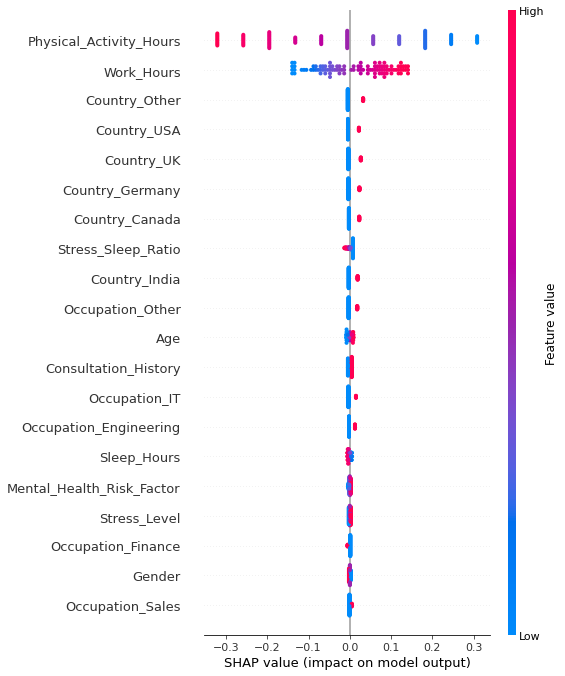

In [49]:
explainer = shap.LinearExplainer(linear_model, X_train)
shap_values = explainer.shap_values(X_test)

# SHAP Summary Plot (Global Interpretability)
shap.summary_plot(shap_values, X_test)

# SHAP Force Plot (Local Interpretability for a Single Prediction)
sample_index = 0  
shap.force_plot(explainer.expected_value, shap_values[sample_index], X_test.iloc[sample_index])

### **Analysis of the SHAP Summary Plot**

1. **Feature Importance Ranking:**
   - Features are ranked from top to bottom based on their overall contribution to the model's predictions.
   - **Most Important Features:**
     - `Physical_Activity_Hours`: The feature with the largest impact on predictions.
     - `Work_Hours`: Another key contributor to the model's output.
   - **Least Important Features:**
     - Features like `Occupation_Sales`, `Gender`, and `Occupation_Finance` have minimal or negligible impact.

2. **Feature Value Colors:**

     - For `Physical_Activity_Hours`, higher values (red) have a positive impact, while lower values (blue) have a negative impact on the predictions.

3. **Interactions and Nonlinearities:**
  
     - `Work_Hours` has a clear concentration of points with varying SHAP values, suggesting its relationship with predictions is not purely linear.

4. **Neutral Features:**
   - Features like `Consultation_History` and `Country_Canada` cluster around SHAP values of 0, indicating limited influence on predictions for most samples.





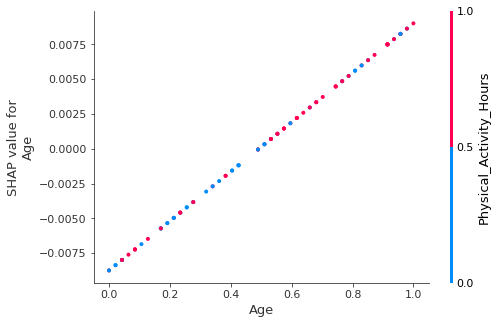

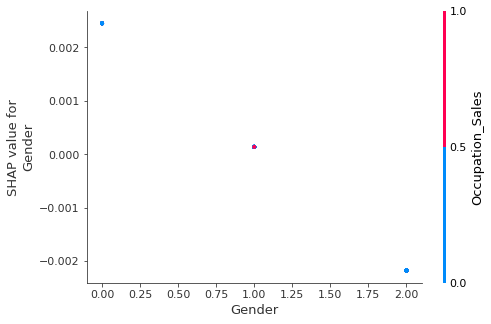

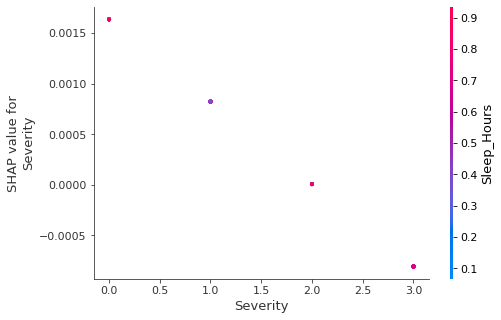

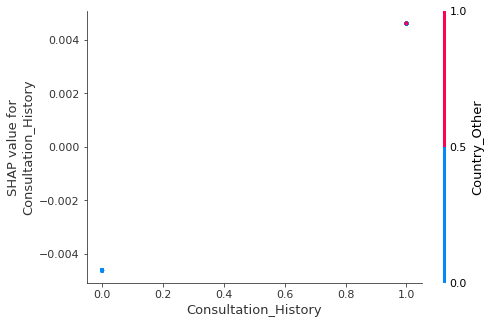

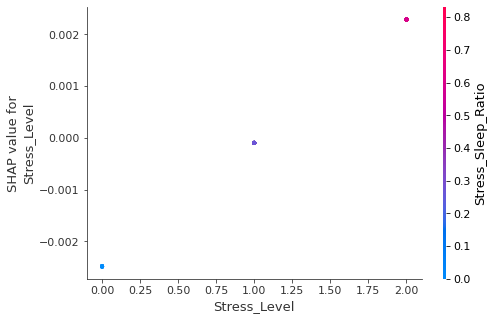

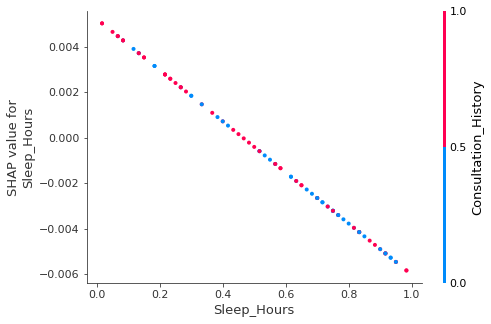

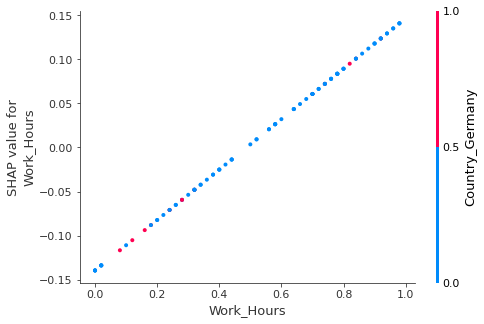

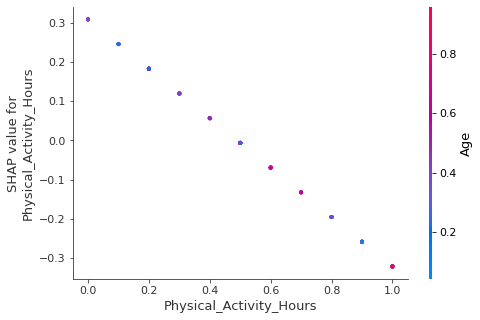

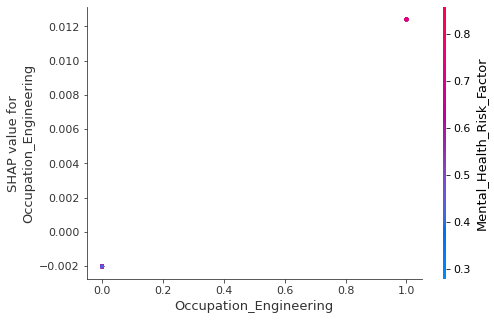

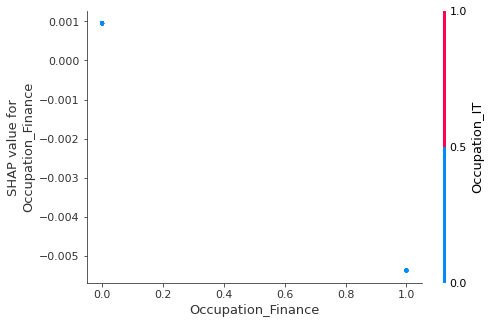

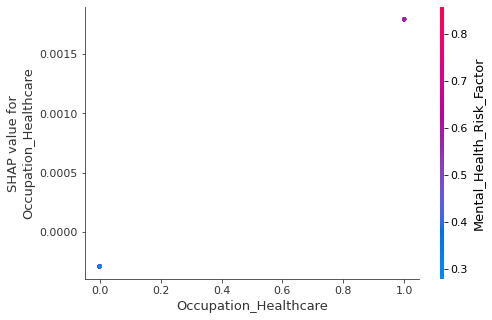

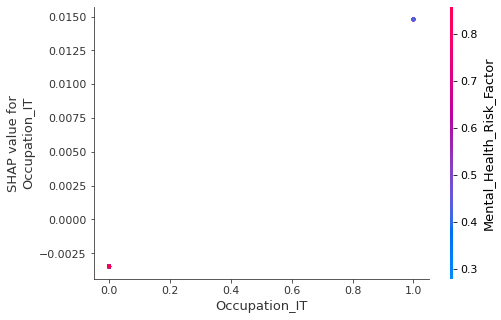

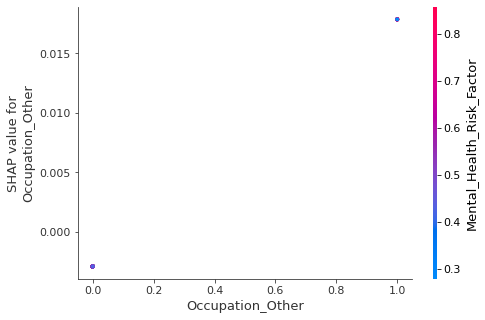

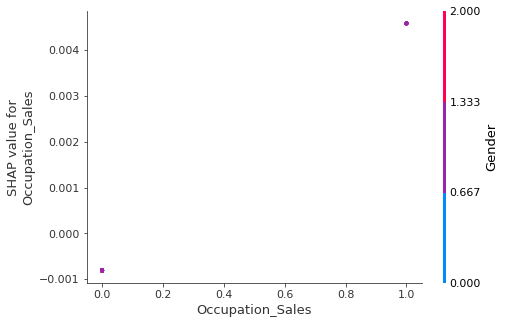

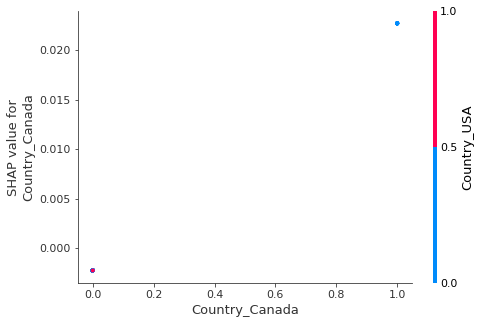

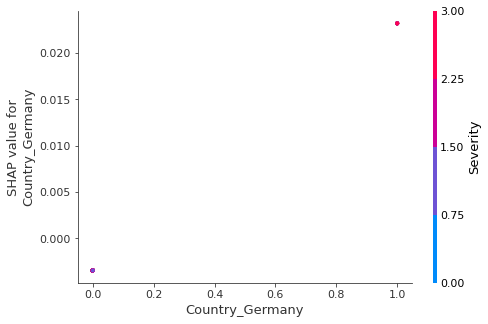

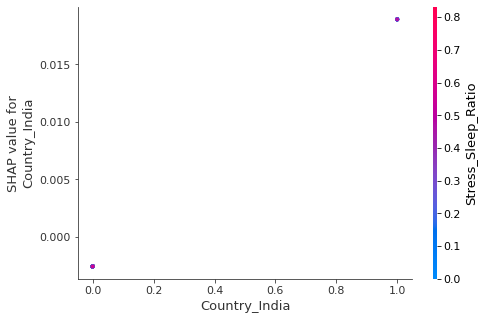

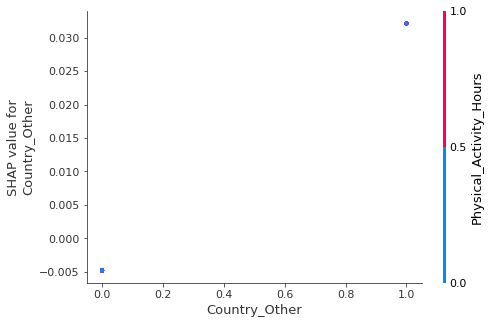

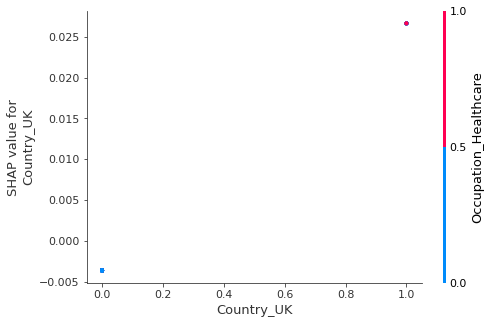

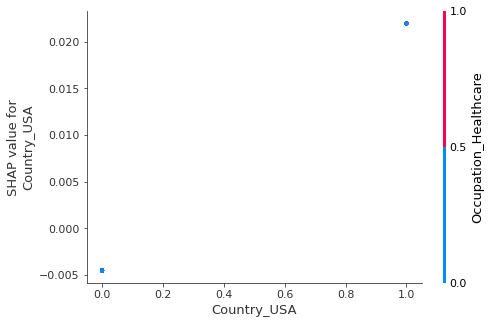

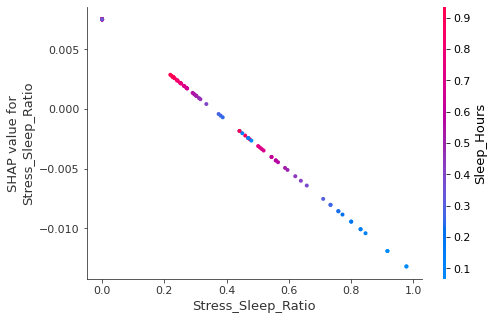

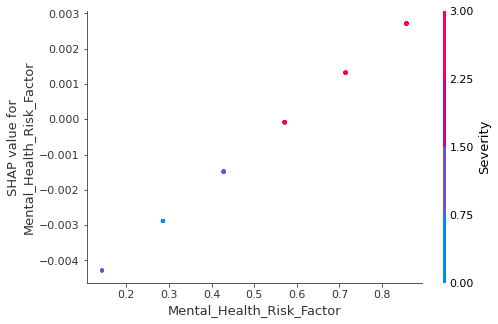

In [50]:
for feature in X_test.columns:
    shap.dependence_plot(feature, shap_values, X_test)

### **LIME Analysis:**
1. **Physical_Activity_Hours:**
   - Most significant positive contributor to the prediction, driving the output substantially in the positive direction.

2. **Work_Hours:**
   - Moderately positive contributor to the prediction, increasing the likelihood of a higher output.

3. **Consultation_History:**
   - Moderate contribution when present, providing some positive influence on the model's predictions.

4. **Country Features (e.g., Country_Other, Country_USA):**
   - Minimal impact in the given instance, suggesting these features are not critical to the prediction in this context.


### **SHAP analysist:**
1. **Physical_Activity_Hours:**
   - Exhibits a strong linear positive relationship; higher values substantially increase the predicted outcome.

2. **Work_Hours:**
   - Displays a positive linear trend, where higher work hours consistently increase the model's predictions.

3. **Stress_Sleep_Ratio:**
   - Negative linear relationship observed; higher stress relative to sleep reduces the predicted outcome significantly.

4. **Sleep_Hours:**
   - Negative linear trend; fewer sleep hours decrease the predicted output, while higher values contribute positively.

5. **Severity:**
   - Nonlinear positive impact, with higher severity values increasing the prediction probability.

6. **Mental_Health_Risk_Factor:**
   - Positive relationship, where higher mental health risk factors increase the likelihood of a higher prediction.

7. **Country Features (e.g., Country_Other, Country_USA):**
   - Consistently near zero SHAP values, reinforcing their minimal contribution to predictions.


## Part 3.4 - Limitations and Development

#### **Model Limitations:**
1. **Performance Metrics:**
   - The **Test R²** for Linear Regression is **0.9037**, which is strong but slightly lower compared to Ridge Regression (**0.9064**) and Neural Network (**0.9155**).
   - This indicates that Linear Regression, while effective, might not capture the complexity of the relationships in the data as well as more advanced models.

2. **Assumption of Linearity:**
   - Linear Regression assumes a linear relationship between the features and the target variable.
   - From the SHAP analysis:
     - Features like `Severity` and `Mental_Health_Risk_Factor` show non-linear impacts on predictions, which Linear Regression may fail to model accurately.

3. **Sensitivity to Outliers:**
   - Linear Regression is highly sensitive to outliers, which could distort the results. Features like `Stress_Sleep_Ratio` and `Sleep_Hours` may introduce such issues if there are extreme values.

4. **No Feature Interaction:**
   - Linear Regression cannot inherently model interactions between features. SHAP analysis suggests potential interactions between:
     - `Physical_Activity_Hours` and `Work_Hours`
     - `Stress_Sleep_Ratio` and `Sleep_Hours`

5. **Overfitting Risk:**
   - The small gap between Train and Test R² suggests low overfitting. However, this may also indicate the model’s limited flexibility to adapt to unseen complexities.


#### **Insights from LIME and SHAP Analysis:**
1. **Key Features Identified:**
   - **Dominant:** `Physical_Activity_Hours`, `Work_Hours`
   - **Moderate Impact:** `Stress_Sleep_Ratio`, `Sleep_Hours`, `Mental_Health_Risk_Factor`
   - These features play a critical role and need accurate modeling.

2. **Feature Contributions:**
   - LIME highlighted the importance of `Physical_Activity_Hours` and `Work_Hours` in driving predictions positively.
   - SHAP revealed a negative linear relationship for features like `Stress_Sleep_Ratio` and `Sleep_Hours`, which Linear Regression struggles to capture.

3. **Low Impact Features:**
   - Features like `Country` and certain `Occupations` contribute minimally, suggesting these could be simplified or excluded for model optimization.


#### **Potential Areas for Improvement:**
1. **Feature Engineering:**
   - Add interaction terms explicitly (e.g., `Physical_Activity_Hours * Work_Hours`) to capture synergies between features.
   - Apply non-linear transformations (e.g., polynomial features) to account for non-linear relationships in features like `Severity`.

2. **Regularization:**
   - Ridge and Lasso Regression showed slightly better performance, suggesting that regularization can mitigate overfitting and improve generalization.

3. **Outlier Detection and Handling:**
   - Address outliers in features like `Stress_Sleep_Ratio` to reduce their potential impact.

4. **Alternative Models:**
   - Consider models like Neural Networks or Gradient Boosting Machines for better flexibility and performance, as indicated by the superior metrics of Neural Networks in the table.

5. **Cross-Validation:**
   - Perform k-fold cross-validation to ensure robust performance evaluation and avoid reliance on a single test set.

6. **Focus on Key Features:**
   - Prioritize improving data quality and modeling for impactful features like `Physical_Activity_Hours`, `Work_Hours`, and `Stress_Sleep_Ratio`.

### **Conclusion:**
While Linear Regression offers a strong baseline model with decent performance, its limitations in capturing non-linear and interactive relationships suggest room for improvement. Regularization (Ridge or Lasso), feature engineering, and alternative models like Neural Networks could significantly enhance predictions. The insights from SHAP and LIME further reinforce the importance of focusing on dominant features and addressing their modeling limitations.


## Part 4 Model Deployment Plan

### **Deployment Plan for Linear Regression and Logistic Regression Models**

#### **Deployment Architecture**
1. **Model Hosting**:
   - **Platform**: Host both models (Linear Regression for regression tasks and Logistic Regression for classification) on a cloud platform such as AWS SageMaker, Google Cloud AI Platform, or Azure ML.
   - **Containerization**: Use Docker to containerize the models for portability and easy deployment.
   - **Framework**: Serve the models using Flask or FastAPI with APIs exposed for inference.

2. **Data Pipelines**:
   - **Data Ingestion**: Real-time data streams (Kafka or AWS Kinesis) or batch data (ETL pipelines via Airflow).
   - **Preprocessing Pipeline**:
     - Standardize input features to match the trained models.
     - Handle missing values (imputation) or categorical encoding as necessary.
   - **Storage**: Store incoming and processed data in a relational database like PostgreSQL or a data lake like S3.

3. **Monitoring Systems**:
   - **Model Monitoring**:
     - Metrics like accuracy (Logistic Regression), R² (Linear Regression), and latency.
     - Tools: Prometheus for monitoring and Grafana for visualization.
   - **Data Drift Detection**: Use tools like EvidentlyAI to monitor data consistency with the training distribution.
   - **Alerting**: Integrate with Slack or PagerDuty for issue notifications.

4. **User Interfaces**:
   - **For End Users**: A front-end web or mobile application for submitting inputs and displaying predictions.
   - **For Admins**: A dashboard to monitor model performance and metrics.
   - **Tools**: React.js or Angular for the front end and Flask/Node.js for the backend.

5. **Scalability**:
   - **Horizontal Scaling**: Use load balancers (AWS ELB, Nginx) to distribute requests across multiple instances of the API.
   - **Autoscaling**: Configure cloud-based autoscaling groups to adjust the number of instances based on demand.
   - **Caching**: Use Redis or Memcached to cache frequently requested results.

6. **Compliance**:
   - **Data Privacy**: Ensure compliance with GDPR (for the EU), HIPAA (for healthcare data), or CCPA (for California).
   - **Security**:
     - Encrypt data in transit (TLS) and at rest.
     - Authenticate API requests via OAuth or API keys.
   - **Audit Logs**: Maintain logs for all API calls, including predictions and errors, for traceability.

#### **Scalability, Maintenance, and Compliance Considerations**
1. **Scalability**:
   - Use Kubernetes for container orchestration and scaling.
   - Implement caching for frequent requests to reduce latency.
   - Distribute the load with a CDN (e.g., Cloudflare).

2. **Maintenance**:
   - Automate model re-training with CI/CD pipelines.
   - Regularly evaluate model performance and retrain with updated data.
   - Implement robust logging for debugging and analytics.

3. **Compliance**:
   - Encrypt sensitive data during preprocessing and predictions.
   - Regularly update security patches and follow best practices for server configurations.
   - Obtain user consent for data collection where required.




## Part 5- Ethical Considerations

#### **Bias Identification and Context**
I personally feel that the data and model shows  a critical issue of **representation bias** in the dataset, where certain sectors, such as specific countries,gender and occupations, do not have sufficient data points. This underrepresentation limits the model's ability to learn meaningful patterns and could lead to the following:
1. **Underfitting for Minor Groups:**
   - Features with sparse representation contribute minimally to predictions (as seen in SHAP and LIME analyses), not because they are irrelevant, but due to insufficient data.
2. **Unfair Treatment:**
   - Individuals from underrepresented demographics (e.g., certain countries or occupations or even gender) might receive suboptimal or less reliable predictions.
3. **Model Generalization Issues:**
   - The model may perform well on the majority groups but poorly generalize to others, exacerbating inequalities.

---

#### **Impact of Representation Bias**
1. **On Model Fairness:**
   - This bias skews predictions towards well-represented groups, making the model inherently less fair.
   - For example, predictions for `Country_Other` and `Occupation_Sales` may not capture the true impact due to limited data.

2. **On Model Performance:**
   - Sparse data in demographics increases variance in predictions for those groups, reducing overall model robustness and reliability.

3. **On Trust and Adoption:**
   - Stakeholders may lose trust in the model if predictions are noticeably biased or inconsistent for underrepresented groups.

---

#### **Actions to be Taken**
1. **Expand the Dataset:**
   - **Collect More Data:**
     - Aim to include more samples for underrepresented groups to ensure balanced representation.
   - **Collaborate Across Regions:**
     - Partner with organizations to access diverse datasets from multiple countries and industries.
   - **Synthetic Data Generation:**
     - Use synthetic data techniques like SMOTE or GANs to augment the dataset, ensuring fairness without compromising model integrity.

2. **Rebalance the Dataset:**
   - **Oversample Minority Groups:**
     - Replicate samples from underrepresented demographics during training to counteract imbalance.
   - **Weight Adjustments:**
     - Apply higher weights to predictions from underrepresented groups to emphasize their impact.

3. **Bias Detection and Mitigation:**
   - **Fairness Metrics:**
     - Evaluate metrics like disparate impact ratio, demographic parity, and equal opportunity.
   - **Re-sampling Techniques:**
     - Apply undersampling for dominant groups or oversampling for minority groups.

4. **Iterative Feature Engineering:**
   - Identify demographic features contributing minimally due to insufficient representation and evaluate their potential when data is increased.

5. **Stakeholder Collaboration:**
   - Engage domain experts to validate whether the underrepresented features are truly less impactful or just constrained by data availability.



### **Conclusion**
To overcome representation bias:
1. Expand and rebalance the dataset to include more data from underrepresented demographics.
2. Apply fairness metrics to assess and mitigate potential biases.
3. Collaborate with domain experts and stakeholders to validate findings and model decisions.

Addressing these issues will not only enhance model performance and fairness but also build trust among diverse stakeholders. 

### **Ethical Analysis of Linear and Logistic Regression Models**

#### **1. Societal Impacts**
- **Positive Impacts:**
  - **Transparency:** Linear and Logistic Regression are inherently interpretable, allowing stakeholders to understand how predictions are made, which promotes trust in the system.
  - **Decision Support:** These models can provide actionable insights in areas like healthcare (e.g., predicting disease risk) and finance (e.g., credit risk assessment), aiding better decision-making.

- **Negative Impacts:**
  - **Bias Amplification:** If the training data contains biases (e.g., socio-economic, gender, or racial biases), the models could reinforce and perpetuate these inequalities in their predictions.
  - **Oversimplification of Complex Systems:** The linear assumptions may fail to capture nuanced real-world relationships, leading to suboptimal decisions in sensitive applications like medical diagnostics.


#### **2. Stakeholder Effects**
- **End Users:**
  - **Fairness and Trust:** End users rely on model predictions for decisions. Unfair outcomes, especially for minority groups, could erode trust.
  - **Accessibility:** Simple models like Linear and Logistic Regression are easier to explain to non-technical stakeholders, making the system more user-friendly.

- **Data Providers:**
  - **Privacy Concerns:** Personal data used for training raises concerns about misuse or unauthorized sharing.
  - **Informed Consent:** Data providers should be aware of how their data is being used, especially in high-stakes applications.

- **Organizations:**
  - **Reputation:** Unethical use of models or biased predictions can damage the organization’s credibility.
  - **Regulatory Compliance:** Misalignment with data protection laws (e.g., GDPR, HIPAA) could result in legal repercussions.


#### **3. Fairness Concerns**
- **Bias in Data:**
  - If the dataset used to train the models is imbalanced or biased, the predictions may unfairly favor certain groups.
  - Example: Gender or race-related imbalances in training data could skew predictions in hiring or credit approval applications.

- **Feature Importance and Impact:**
  - Features like `Work_Hours`, `Physical_Activity_Hours`, and `Mental_Health_Risk_Factor` identified from SHAP and LIME analyses may disproportionately influence predictions if not validated for fairness.

- **Underrepresented Groups:**
  - The models might perform poorly for groups that are underrepresented in the training data, leading to unequal treatment.


#### **Plans for Ethical Model Deployment**
1. **Bias Mitigation:**
   - Perform bias detection on training data using fairness metrics (e.g., disparate impact ratio, equal opportunity).
   - Rebalance the dataset using techniques like oversampling or under-sampling for minority groups.

2. **Regular Audits:**
   - Regularly audit model predictions for signs of unfair treatment or performance discrepancies across groups.

3. **Stakeholder Communication:**
   - Clearly communicate model limitations and confidence levels in predictions to stakeholders.
   - Provide channels for users to challenge and appeal predictions.

4. **Privacy Protection:**
   - Anonymize sensitive data fields before using them in training.
   - Ensure data storage and processing comply with regulations like GDPR and HIPAA.

5. **Continuous Monitoring:**
   - Monitor for data drift, especially if new data is added, to ensure the model continues to perform fairly.

6. **Algorithm Selection:**
   - Considering using more robust models (e.g., ensemble models) for complex systems where linear models fall short, ensuring fairness remains a priority.
